## Data Exploration: Feature Engineering for Multinomial Epilepsy Classification

### In this notebook, a variety of feature extraction approaches are explored, including:

1. Hurst Exponent
2. Petrosian Fractal Dimension
3. Hjorth Mobility/Complexity
3. Spectral Entropy
4. Discrete Wavelet Transform



### Setup

In [2]:
import numpy as np
import pandas as pd
import util

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


### Data
We first parse and normalize our dataset.

In [3]:
X, y, ids, chunks = util.parse_data()
n = X.shape[0]
classes = np.unique(y)
num_chunks = np.unique(chunks).shape[0]

# Set up evaluation metrics
scoring = util.get_scoring_metrics(classes)

### Hurst Exponent and Petrosian Fractal Dimension (PFD)

In [4]:
from FeatureExtractionAlgorithms import pfd, hurst, hfd, dfa, hjorth, spectral_entropy, bin_power
import math

In [45]:
X_b = np.concatenate((np.apply_along_axis(pfd, 1, X).reshape(n, 1), np.apply_along_axis(hurst, 1, X).reshape(n, 1)), axis=1)

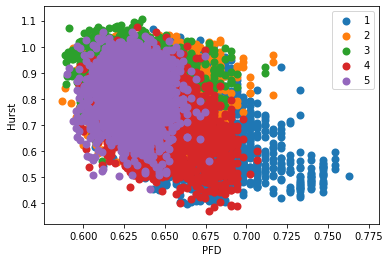

In [40]:
from matplotlib import pyplot as plt

plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_b[y == c, 1], linewidth=2, label=str(c))
plt.xlabel('PFD')
plt.ylabel('Hurst')
plt.legend()
plt.show()

### Hjorth Complexity and Petrosian Fractal Dimension

In [47]:
X_c = np.concatenate((np.apply_along_axis(hurst, 1, X).reshape(n, 1), np.apply_along_axis(hjorth, 1, X).reshape(n, 2)), axis=1)

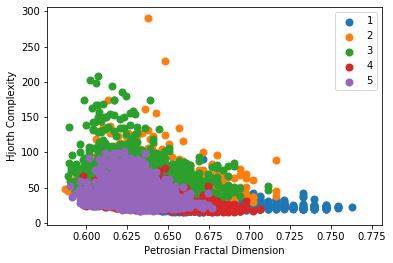

In [52]:
from matplotlib import pyplot as plt

plt.figure()
for c in classes:
    plt.scatter(X_b[y == c, 0], X_c[y == c, 2], linewidth=2, label=str(c))
plt.xlabel('Petrosian Fractal Dimension')
plt.ylabel('Hjorth Complexity')
plt.legend()
plt.show()

### Spectral Entropy Feature Extraction and Visualization

In [5]:
def SpectralEntropy( x ):
    fs = 128
    band = [1,4,8,12,30]
    b = bin_power(x,band,fs)
    resp = spectral_entropy(x,band,fs,Power_Ratio=b)
    resp = [0 if math.isnan(x) else x for x in resp]
    return resp

In [6]:
X_entropy = np.apply_along_axis(SpectralEntropy, 1, X)

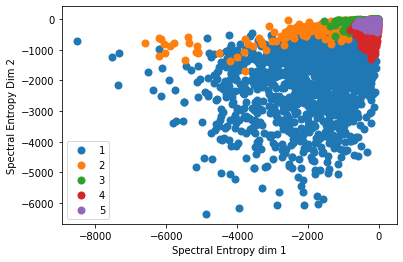

In [32]:
from matplotlib import pyplot as plt

plt.figure()
for c in classes:
    plt.scatter(X_entropy[y == c, 0], X_entropy[y == c, 2], linewidth=2, label=str(c))
plt.xlabel('Spectral Entropy dim 1')
plt.ylabel('Spectral Entropy Dim 2')
plt.legend()
plt.show()

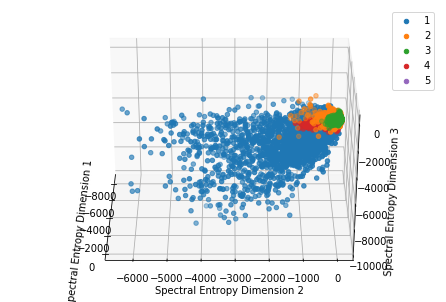

In [24]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

for c in classes:
    ax.scatter(X_entropy[y == c, 0], X_entropy[y == c, 2], X_entropy[y == c, 1], label=str(c))
ax.set_xlabel('Spectral Entropy Dimension 1')
ax.set_ylabel('Spectral Entropy Dimension 2')
ax.set_zlabel('Spectral Entropy Dimension 3')

plt.legend()
ax.view_init(30, 360)
plt.show()


## Hurst, HFD, DFA, and PFD in KNN Classifier
In this section, we train a K-Nearest Neighbors classifier using a concatenation of extracted features and evaluate its performance

In [26]:
X_v = np.concatenate(\
                     (\
                      np.apply_along_axis(hurst, 1, X).reshape(n, 1), \
                      np.apply_along_axis(hfd, 1, X, Kmax=5).reshape(n, 1), \
                      np.apply_along_axis(dfa, 1, X).reshape(n, 1), \
                      np.apply_along_axis(pfd, 1, X).reshape(n, 1), \
                      np.amin(X, axis=1).reshape(n, 1), \
                      np.std(X, axis=1).reshape(n, 1) \
                     )\
                     , axis=1)

In [34]:
b_train_scores, b_test_scores, b_fold_acc, b_cm = util.evaluate_model(X_b, y, ids, classes, 'knn', scoring)

In [35]:
b_train_scores

{'accuracy': 0.5403961352657005,
 'f1_macro': 0.5347465939172127,
 'f1_class_1': 0.7212517125261397,
 'f1_class_2': 0.46472487041256433,
 'f1_class_3': 0.5243058067933862,
 'f1_class_4': 0.4790960033111434,
 'f1_class_5': 0.4843545765428294}

In [36]:
b_test_scores

{'accuracy': 0.3901739130434783,
 'f1_macro': 0.3640305210896451,
 'f1_class_1': 0.5990363793071782,
 'f1_class_2': 0.2636261664218188,
 'f1_class_3': 0.3447030215453968,
 'f1_class_4': 0.3255531751950664,
 'f1_class_5': 0.2872338629787653}

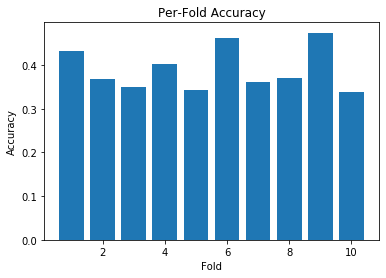

In [37]:
util.plot_fold_accuracy(b_fold_acc)

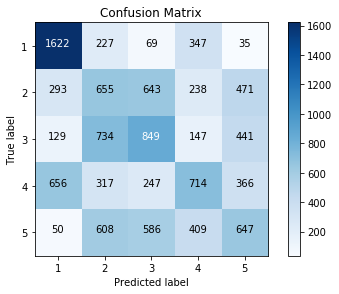

In [38]:
util.visualize_confusion_matrix(b_cm, classes)

## Spectral Entropy Features with KNN Algorithm
In this section, we train a K-Nearest Neighbors classifier using the Spectral Entropy Features

In [66]:
b_train_scores, b_test_scores, b_fold_acc, b_cm = util.evaluate_model(X_entropy, y, ids, classes, 'knn', scoring)

In [67]:
b_train_scores

{'accuracy': 0.7679323671497584,
 'f1_macro': 0.7664798670631843,
 'f1_class_1': 0.9559425712652342,
 'f1_class_2': 0.6479620490255744,
 'f1_class_3': 0.6739950199622775,
 'f1_class_4': 0.790476046657899,
 'f1_class_5': 0.7640236484049365}

In [68]:
b_test_scores

{'accuracy': 0.680608695652174,
 'f1_macro': 0.6527926947685254,
 'f1_class_1': 0.9189388733051012,
 'f1_class_2': 0.4778136228771242,
 'f1_class_3': 0.5173103781816933,
 'f1_class_4': 0.6971705963173938,
 'f1_class_5': 0.6527300031613145}

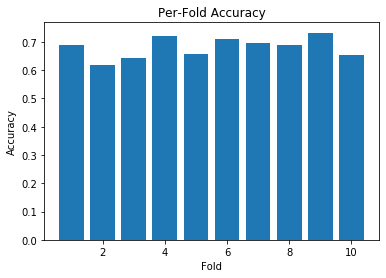

In [69]:
util.plot_fold_accuracy(b_fold_acc)

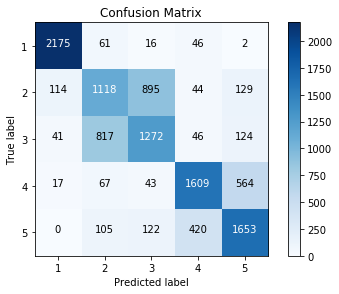

In [70]:
util.visualize_confusion_matrix(b_cm, classes)

## Spectral Entropy Features with SoftMax Algorithm
In this section, we train a K-Nearest Neighbors classifier using the Spectral Entropy Features

In [71]:
b_train_scores, b_test_scores, b_fold_acc, b_cm = util.evaluate_model(X_entropy, y, ids, classes, 'sreg', scoring)

In [72]:
b_train_scores

{'accuracy': 0.6774202898550725,
 'f1_macro': 0.6728209038369155,
 'f1_class_1': 0.9350937219815106,
 'f1_class_2': 0.4378973556296666,
 'f1_class_3': 0.557386871363892,
 'f1_class_4': 0.7419862759830347,
 'f1_class_5': 0.691740294226473}

In [73]:
b_test_scores

{'accuracy': 0.6520869565217391,
 'f1_macro': 0.6289060306153557,
 'f1_class_1': 0.9178576067637885,
 'f1_class_2': 0.37803410926811315,
 'f1_class_3': 0.5067964225474787,
 'f1_class_4': 0.7101910435053018,
 'f1_class_5': 0.6316509709920964}

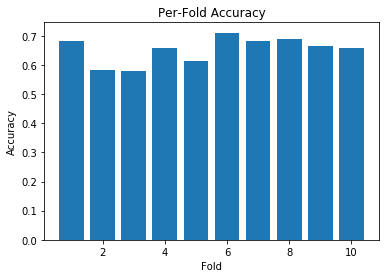

In [74]:
util.plot_fold_accuracy(b_fold_acc)

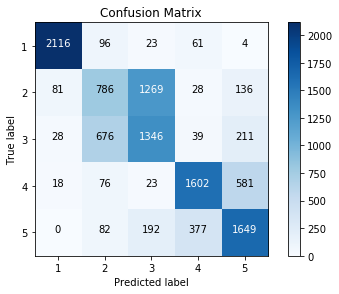

In [75]:
util.visualize_confusion_matrix(b_cm, classes)

## Discrete Wavelet Transform

In [1]:
import pywt

In [7]:
X_dwt = np.apply_along_axis(pywt.dwt, 1, X, 'db4')

In [12]:
a, b, c = np.shape(X_dwt)
X_a_dwt = X_dwt[:, 0, :].reshape(a, c)
X_b_dwt = X_dwt[:, 1, :].reshape(a, c)

## DWT Features with KNN Algorithm
In this section, we train a K-Nearest Neighbors classifier using the DWT features

In [15]:
b_train_scores, b_test_scores, b_fold_acc, b_cm = util.evaluate_model(X_a_dwt, y, ids, classes, 'knn', scoring)

In [16]:
b_train_scores

{'accuracy': 0.675816425120773,
 'f1_macro': 0.6663652685041812,
 'f1_class_1': 0.9386432207699625,
 'f1_class_2': 0.6309490240486503,
 'f1_class_3': 0.6832469113929961,
 'f1_class_4': 0.609765640660338,
 'f1_class_5': 0.4692215456489596}

In [17]:
b_test_scores

{'accuracy': 0.4804347826086956,
 'f1_macro': 0.4581671089734275,
 'f1_class_1': 0.8365463568985685,
 'f1_class_2': 0.44696654448243445,
 'f1_class_3': 0.43995035133593985,
 'f1_class_4': 0.4254254142441569,
 'f1_class_5': 0.1419468779060381}

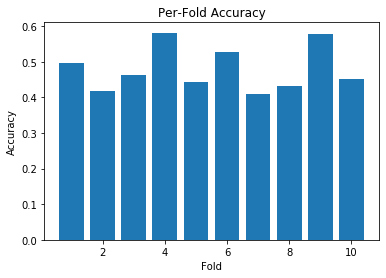

In [18]:
util.plot_fold_accuracy(b_fold_acc)

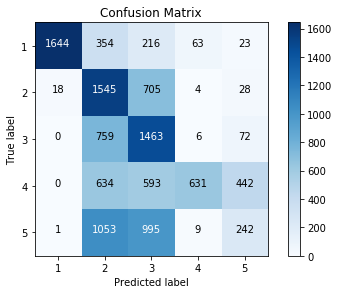

In [19]:
util.visualize_confusion_matrix(b_cm, classes)

(11500, 92)
